In [33]:
#!pip install opencv-python

import cv2
from skimage.io import imshow
import matplotlib.pyplot as plt

### Импорт и просмотр изображения

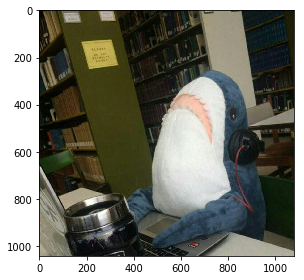

In [173]:
img = cv2.imread('data/ikea_shark.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imshow(img);

### Обрезаем изображение

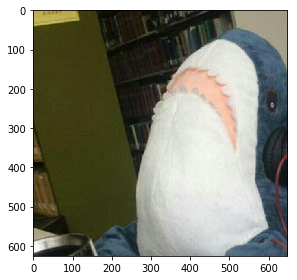

In [3]:
# обрезаем 20% размера изображения по краям
x_len = img.shape[0]; y_len = img.shape[1]
x_del = int(x_len * 0.2); y_del = int(y_len * 0.2)
img_cropped = img[0+x_del: x_len-x_del, 0+y_del: y_len-y_del]
imshow(img_cropped);

### Измененяем размер изображения

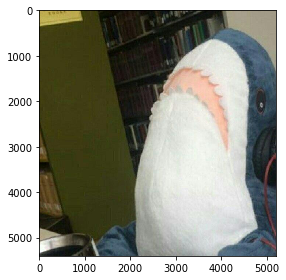

In [5]:
img_resized = cv2.resize(img_cropped, (5*x_len, 5*y_len), interpolation = cv2.INTER_NEAREST)
imshow(img_resized);

### Поворачиваем изображение

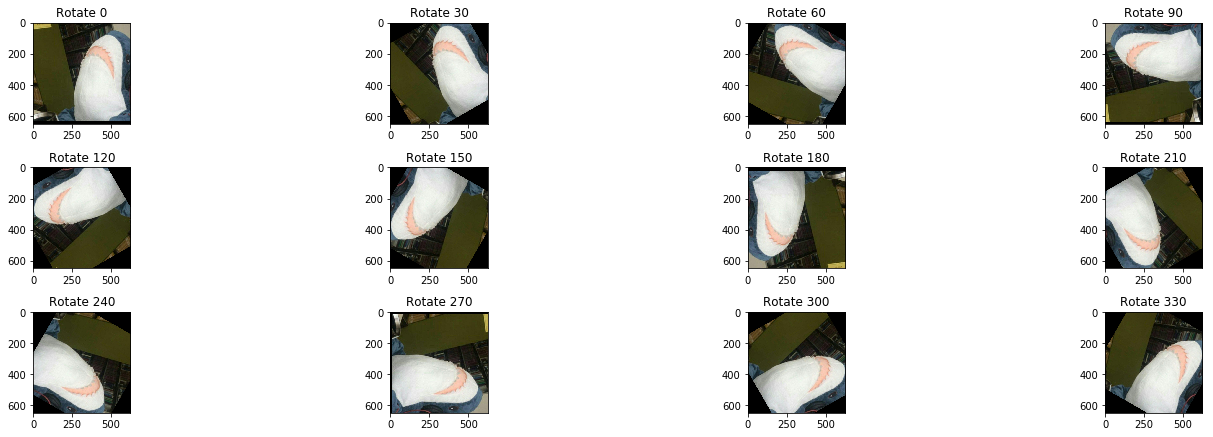

In [67]:
import time
import numpy as np

fig=plt.figure(figsize=(20,20))
i = 1; j = 1; count = 1
for angle in np.arange(0,360,30):
    img_cropped_shape = [img_cropped.shape[0], img_cropped.shape[1]]
    img_center = tuple(np.array([img_cropped.shape[0], img_cropped.shape[1]]) / 2)
    rot_mat = cv2.getRotationMatrix2D(img_center, angle, 1.0)
    res = cv2.warpAffine(img_cropped, rot_mat, tuple(img_cropped_shape), flags=cv2.INTER_LINEAR)
    fig.add_subplot(int(360/40) + 1,4,count)
    imshow(res)
    plt.title(f'Rotate {angle}')
    count += 1; j += 1
    if (j % 5 == 0) & (j != 1): i +=1

### Изменяем градацию серого и порог

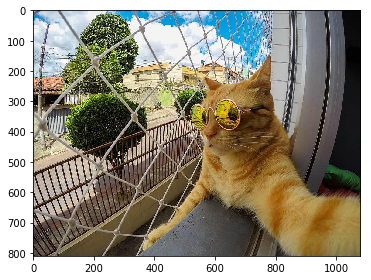

In [123]:
cat_img = cv2.imread('data/cat_gap.jpg')
cat_img = cv2.cvtColor(cat_img, cv2.COLOR_BGR2RGB)
imshow(cat_img);

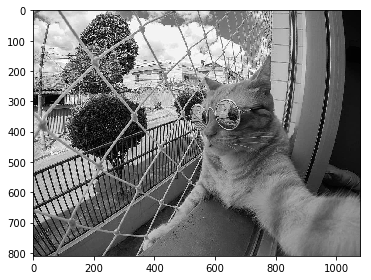

In [124]:
gray_cat = cv2.cvtColor(cat_img, cv2.COLOR_RGB2GRAY)
imshow(gray_cat);

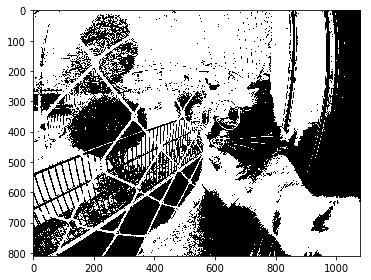

In [125]:
ret,cat_threshold = cv2.threshold(gray_cat,100,255,0)
imshow(cat_threshold);

### Применяем размытие / разглаживание

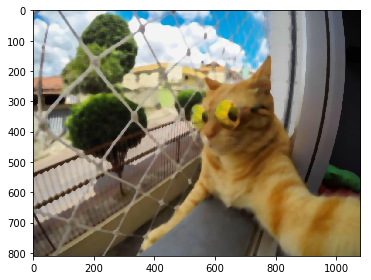

In [126]:
cat_blur_median = cv2.medianBlur(cat_img,13)
imshow(cat_blur_median);

### Рисуем прямоугольник

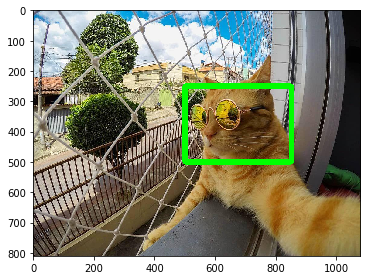

In [128]:
cat_rect = cat_img.copy()
cv2.rectangle(cat_rect, (500, 250), (850, 500), (0,255,0), 15)
imshow(cat_rect);

### Рисуем линию

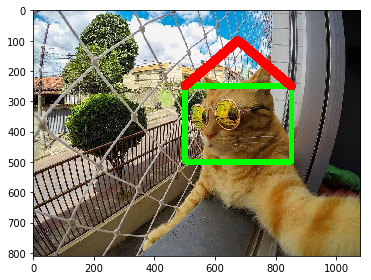

In [132]:
cat_line = cat_rect.copy()
cv2.line(cat_line, (500, 250), (675, 100), (255,0,0), 30)
cv2.line(cat_line, (675, 100), (850, 250), (255,0,0), 30)
imshow(cat_line);

### Пишем текст

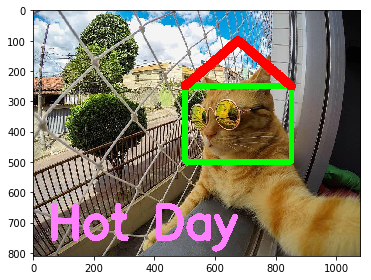

In [136]:
cat_text = cat_line.copy()
cv2.putText(cat_text, "Hot Day", (50,750),cv2.FONT_ITALIC, 5, (255, 128, 255), 20)
imshow(cat_text)

### Распознаем лица

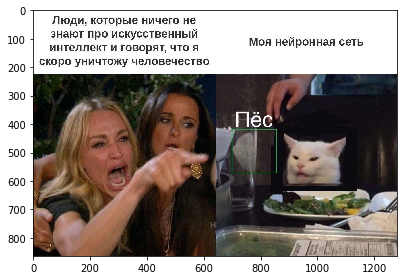

In [158]:
img_sing = cv2.imread('data/singularity.jpg')
img_sing = cv2.cvtColor(img_sing, cv2.COLOR_BGR2RGB)
imshow(img_sing);

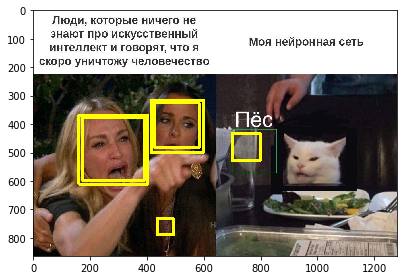

In [161]:
img_sing_copy = img_sing.copy()
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
gray_sing = cv2.cvtColor(img_sing_copy, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_sing, 1.1, 4)
for (x, y, w, h) in faces:
    cv2.rectangle(img_sing_copy, (x, y), (x+w, y+h), (255, 255, 0), 10)
imshow(img_sing_copy);

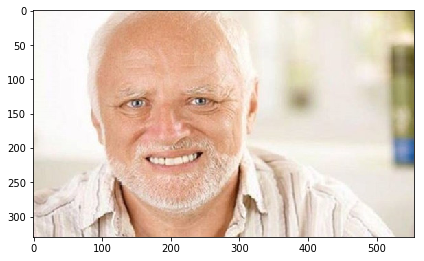

In [171]:
herald = cv2.imread('data/herald.jpeg')
herald = cv2.cvtColor(herald, cv2.COLOR_BGR2RGB)
imshow(herald);

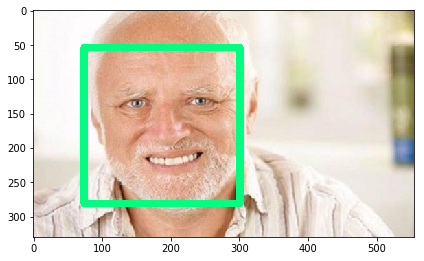

In [172]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
gray_herald = cv2.cvtColor(herald, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_herald, 1.1, 4)
for (x, y, w, h) in faces:
    cv2.rectangle(herald, (x, y), (x+w, y+h), (0, 255, 128), 10)
imshow(herald);

### Распознаем объекты (contours)

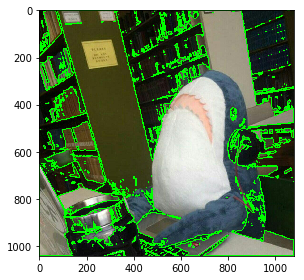

In [270]:
img2 = img.copy()
hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
lower_blue = np.array([0, 0, 50])
upper_blue = np.array([255, 255, 255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
for contour in contours:
    cv2.drawContours(img2, contour, -1, (0, 255, 0), 3)
imshow(img2);

### Сохраняем изображения

In [273]:
cv2.imwrite('Shark matrix.jpg', cv2.cvtColor(img2, cv2.COLOR_RGB2BGR));